# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [5]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

UsageError: Line magic function `%` not found.


### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

WAV файл (Windows PCM). Он представляет собой две, четко делящиеся, области. Одна из них — заголовок файла, другая — область данных. В заголовке файла хранится информация о:
    Размере файла.
    Количестве каналов.
    Частоте дискретизации.
    Количестве бит в сэмпле (эту величину ещё называют глубиной звучания).
 В области данных хранится информация о амплитуде по времени.


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [6]:
import librosa
import scipy
import librosa.display
from IPython.display import Audio

% matplotlib nbagg
import matplotlib.style as ms

UsageError: Line magic function `%` not found.


In [7]:
link_to_audio = "Untitled.wav"

In [8]:
y_orig, sr_orig = librosa.load(link_to_audio, sr=None)
print(f"New number of samples {len(y_orig)} Sampling rate : {sr_orig}")

New number of samples 268288 Sampling rate : 48000


In [9]:
Audio(data=y_orig, rate=sr_orig, )

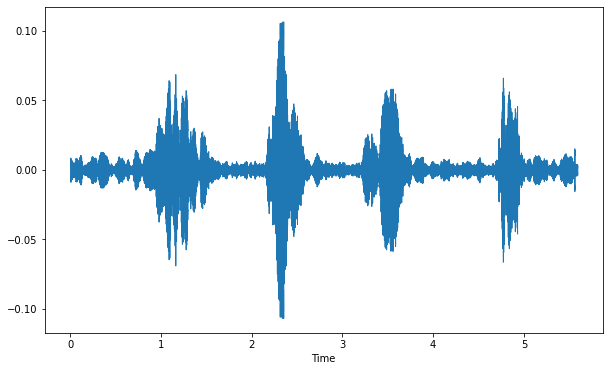

In [10]:
plt.figure(figsize=(10, 6))

librosa.display.waveshow(y=y_orig, sr=sr_orig)

In [11]:
def change_dis_play(y_orig, sr):
    y = librosa.resample(y_orig, orig_sr=sr_orig, target_sr=sr)
    print(f"New number of samples {len(y)} Sampling rate : {sr}")
    sound = Audio(data=y, rate=sr)
    return sound



In [12]:
change_dis_play(y_orig, 20000)

New number of samples 111787 Sampling rate : 20000


In [13]:
change_dis_play(y_orig, 15000)

New number of samples 83840 Sampling rate : 15000


In [14]:
change_dis_play(y_orig, 10000)

New number of samples 55894 Sampling rate : 10000


In [15]:
change_dis_play(y_orig, 5000)

New number of samples 27947 Sampling rate : 5000


In [16]:
change_dis_play(y_orig, 2000)

New number of samples 11179 Sampling rate : 2000


Мой компьютер не проигрывает данные с более низкой частотой дискретизации, но можно предположить, что при частоте дискретизации меньшем чем 1 Гц Речь станет неразличимой.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

mp3 и ogg используют сжатие практически (в зависимости от битрейта) без потерь качества звука  (почти но разница есть и её можно ощутить только при наличии хорошей аппаратуры и слуха) , но с выигрышем в занимаемой памяти и скорости чтения, что важно, к примеру для переносимых устройств. Waf не сжимает данные, а хранит неизменный звук т.е. хранит все данные аналогово сигнала при переносе в дискретный формат.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [17]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round()) // 10 * 10,
                         (data.max().round()) // 10 * 10 + 10, step=5))
    plt.grid(which='major',
             color='k',
             linewidth=1)
    plt.grid(which='minor',
             color='k',
             linestyle=':')
    plt.show()

In [19]:
# Читаем данные с подготовленными сигналами
import pickle

with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

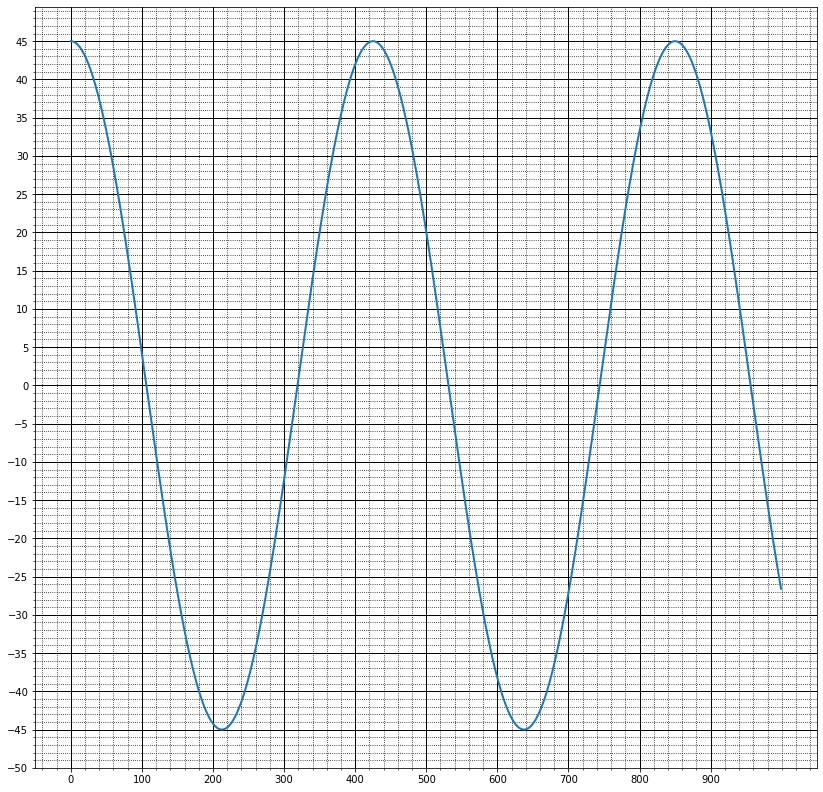

In [20]:
draw_signal(test_data['task2']['a'])

In [21]:
np.argsort(test_data['task2']['a'])[::-1][:3]

array([  0, 425, 850], dtype=int64)

In [22]:
# YOUR CODE HERE
A = 45
f = 1 / 425
t = np.arange(0, 1000, 1)
w = (2. * np.pi) * f
a = A * np.cos(w * t + 0)

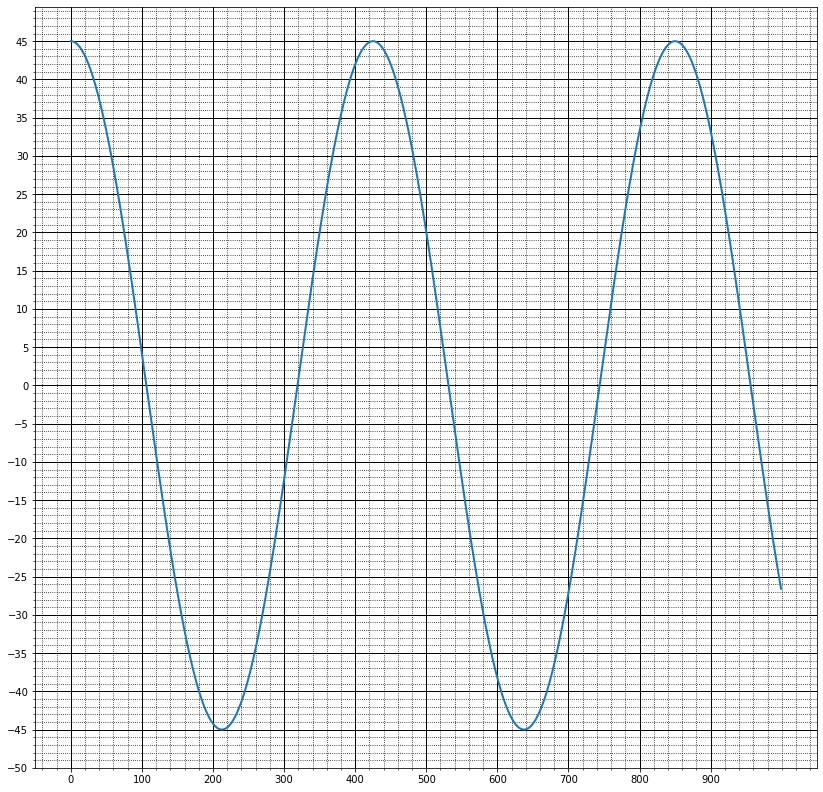

In [23]:
draw_signal(a)

In [24]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0148$

3. Фаза - $\phi= 0$

### Сигнал ***b***

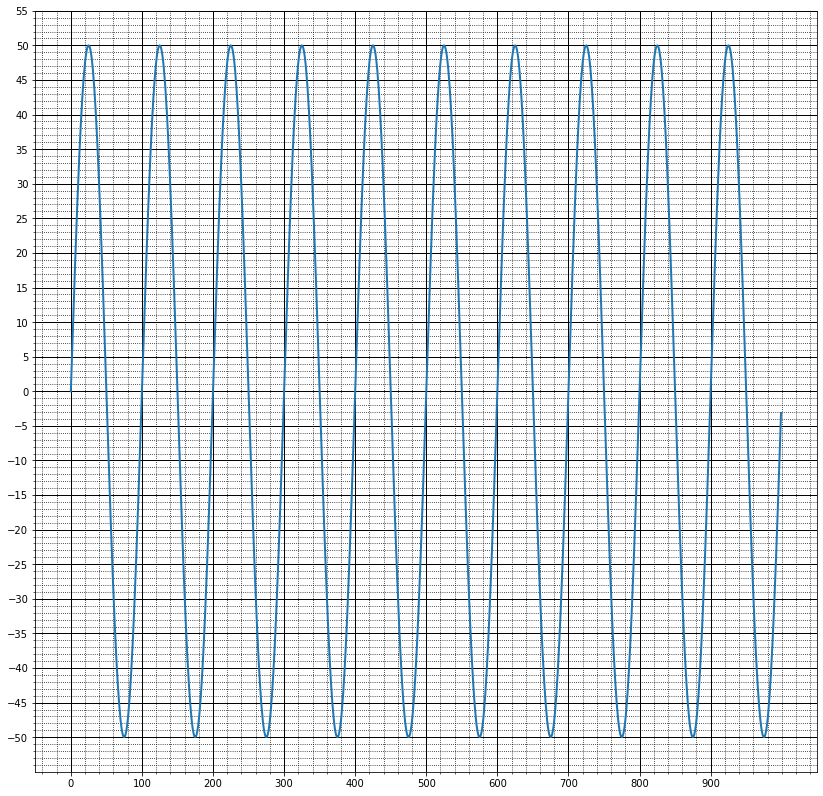

In [25]:
draw_signal(test_data['task2']['b'])

In [26]:
np.argsort(test_data['task2']['b'])[::-1][:10]

array([625, 125,  25, 425, 325, 225, 825, 725, 525, 925], dtype=int64)

In [27]:
# YOUR CODE HERE
A = 50
f = 1 / 100
t = np.arange(0, 1000, 1)
w = (2. * np.pi) * f
b = A * np.cos(w * t - np.pi / 2)

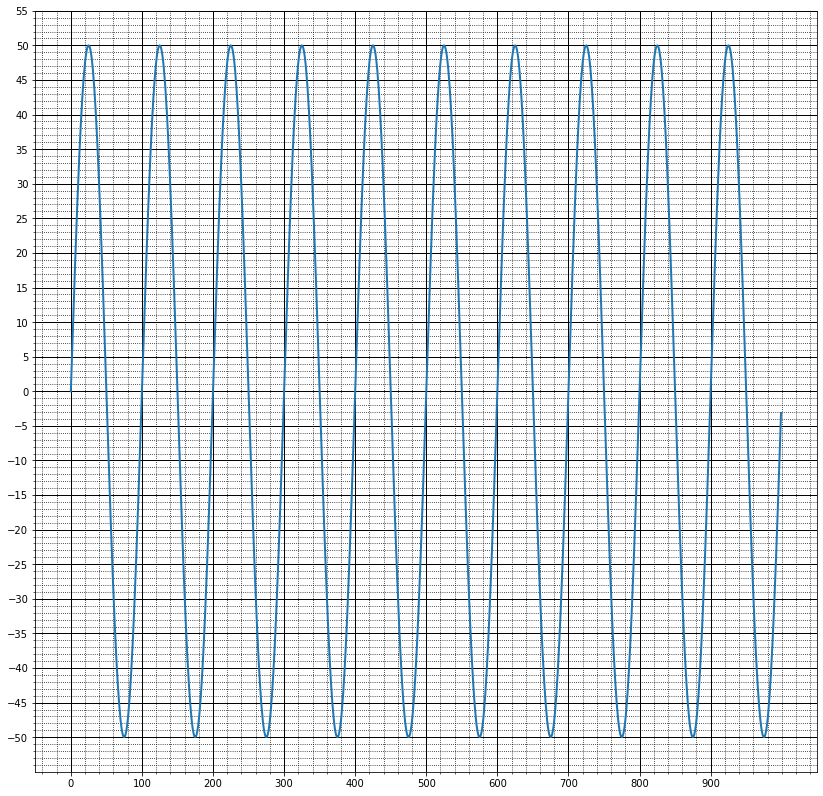

In [28]:
draw_signal(b)

In [29]:
assert len(b) == 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


In [30]:
w

0.06283185307179587

**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0628$

3. Фаза - $\phi= \frac{\pi}{2}$

### Сигнал ***c***

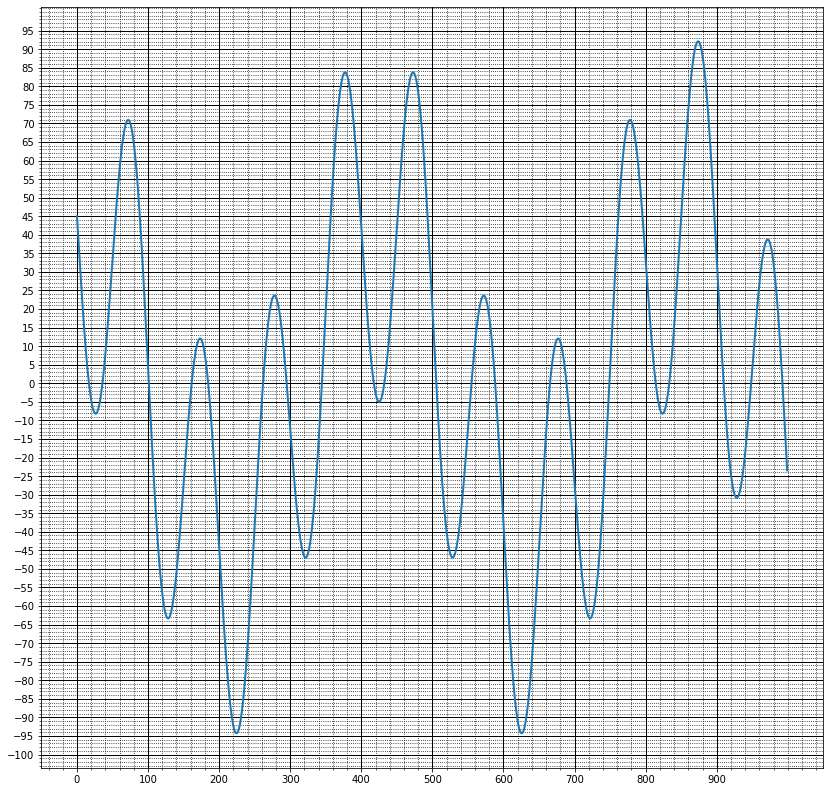

In [31]:
draw_signal(test_data['task2']['c'])

In [32]:
np.argsort(test_data['task2']['b'])[::-1][:15]

array([625, 125,  25, 425, 325, 225, 825, 725, 525, 925, 926, 924, 826,
       626, 326], dtype=int64)

In [33]:
# объеденим две предыдущие
c = a - b

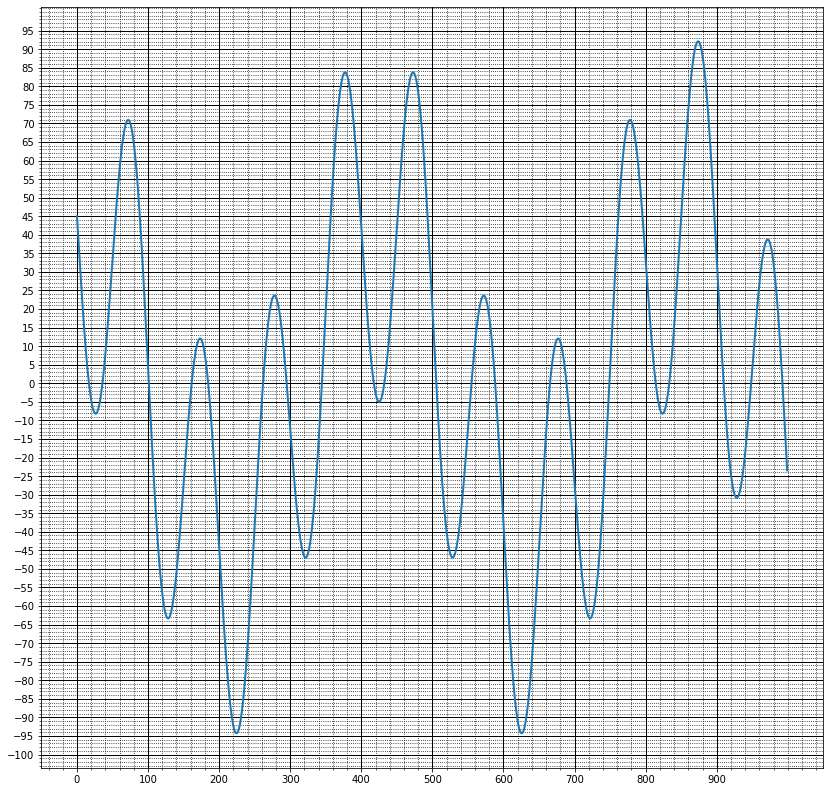

In [34]:
draw_signal(c)

In [35]:
assert len(c) == 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [36]:
def convolve(in1, in2):
    n_sig = in1.shape[0]
    n_ker = in2.shape[0]
    b_rev = in2[::-1].copy()
    a_new = np.pad(in1, (n_ker - 1, 0))
    conv_s = n_sig + n_ker - 1
    res = np.zeros(conv_s, dtype="int")
    for i_conv in range(conv_s):
        a_temp = a_new[i_conv: i_conv + n_ker]
        res[i_conv] = np.dot(a_temp, b_rev[:a_temp.shape[0]])
    return res

In [37]:
import scipy
from scipy import signal


def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [38]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

In [39]:
scipy.signal.convolve(a, b, method='direct')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 6, 8, 9, 9, 9, 9, 9, 9, 8,
       6, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

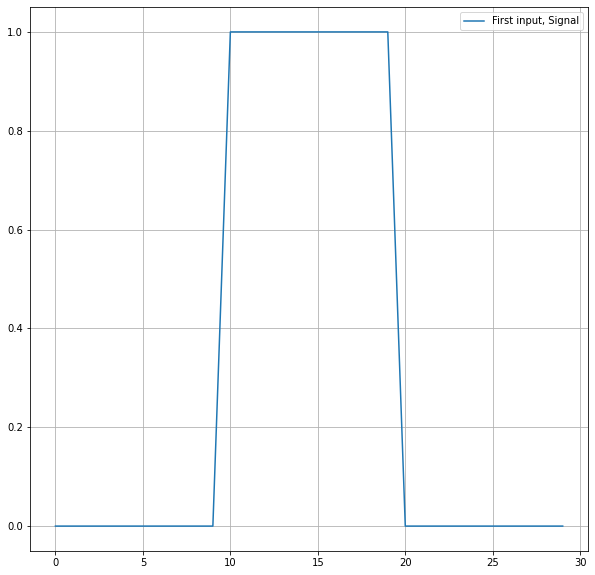

In [41]:
plt.figure(figsize=(10, 10))
plt.plot(a, label="First input, Signal")
plt.grid()
plt.legend()
plt.show()


Сигнал **b**

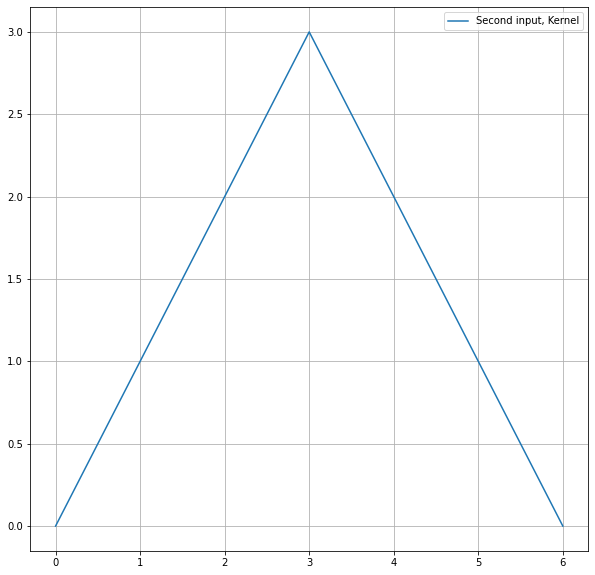

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(b, label="Second input, Kernel")
plt.grid()
plt.legend()
plt.show()

Свертка **a** и **b**

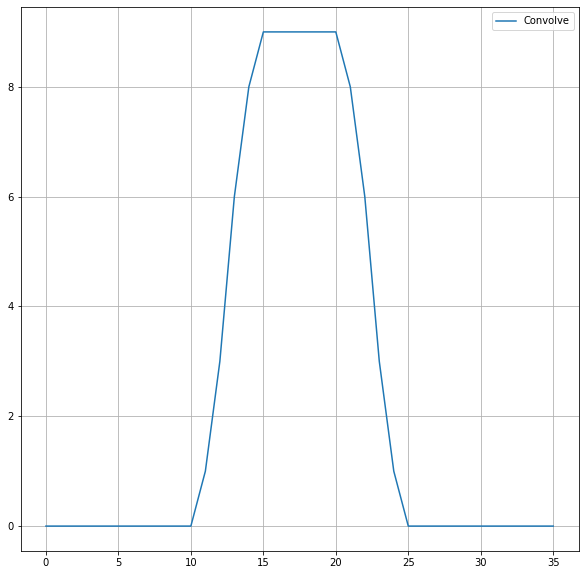

In [43]:
plt.figure(figsize=(10, 10))
plt.plot(convolve(a, b), label="Convolve")
plt.grid()
plt.legend()
plt.show()

Все 3 графика на одной картинке:

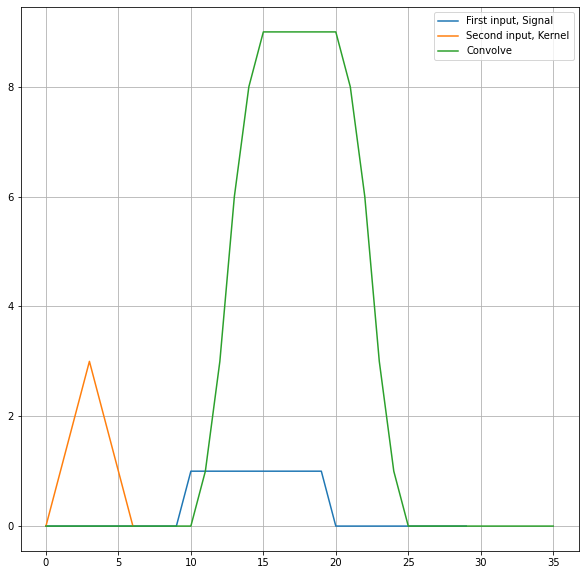

In [44]:
plt.figure(figsize=(10, 10))
plt.plot(a, label="First input, Signal")
plt.plot(b, label="Second input, Kernel")
plt.plot(convolve(a, b), label="Convolve")
plt.grid()
plt.legend()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [47]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise
    # YOUR CODE HERE
    s = noise.copy()
    return s

In [48]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate / frequency)))  # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0]) / 2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise) + 1: 2 * len(noise)],
                   (noise[:-1] + noise[1:]) / 2), "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2 * len(noise)], (noise[0] / 2 + noise[-1]) / 2), "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2 * len(noise) + 2: 3 * len(noise)],
                   (((noise[:-1] + noise[1:]) / 2)[:-1] + ((noise[:-1] + noise[1:]) / 2)[
                                                          1:]) / 2), "Bad requrent rule( 3 iteration)"
print('All Ok!')

IndexError: index 535 is out of bounds for axis 0 with size 535

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [49]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

ValueError: x and y must have same first dimension, but have shapes (88200,) and (535,)

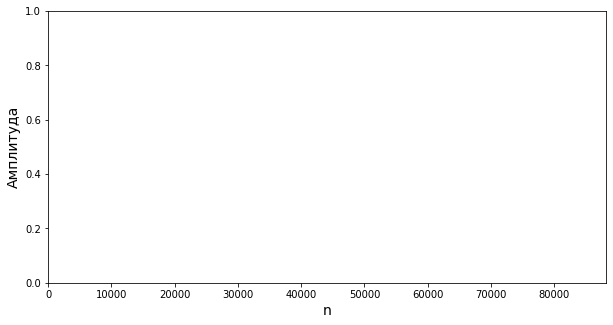

In [50]:
plt.figure(figsize=(10, 5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len + 1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE